<a href="https://colab.research.google.com/github/pmewi/Predictive-Modeling-using-Linear-Regression/blob/main/Predictive_Modeling_with_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This assignment will help build your skills in predictive modeling using linear regression. You will utilize a dataset containing data from previous NBA seasons for winning percentage (WIN%), field goal percentage (FG%), 3 point percentage (3P%), free throw percentage (FT%), and turnovers per game (TOV). Your goal for this assignment is to use data from FG%, 3P%, FT%, and TOV to model the outcome variable of WIN%. A scenario like this might be used to look at trends in the league and determine areas of the game that have the largest influence on winning.

In [ ]:
#read the necessary data file
import pandas as pd
nbadf = pd.read_csv("/content/nba team stats.csv")
nbadf.head()

,ID,TEAM,WIN%,FG%,3P%,FT%,TOV,SEASON
0,0,Phoenix Suns,80.8,47.8,36.3,79.1,13.3,2020-21
1,1,Golden State Warriors,75.5,46.7,36.4,76.4,15.6,2020-21
2,2,Memphis Grizzlies,67.3,45.7,33.9,73.7,13.3,2020-21
3,3,Miami Heat,63.0,45.9,37.5,81.5,14.9,2020-21
4,4,Chicago Bulls,62.3,47.8,37.2,81.4,13.0,2020-21


In [ ]:
#check for missing data and impute values for each of the variables as necessary
import numpy as np
nbadf.isna().sum()

ID        0
TEAM      0
WIN%      0
FG%       0
3P%       0
FT%       0
TOV       0
SEASON    0
dtype: int64

No missing values. Any missing values would have returned a value of "1"

In [ ]:
#check each of the variables for any potential outliers and remove them if necessary
import matplotlib.pyplot as plt
import numpy as np

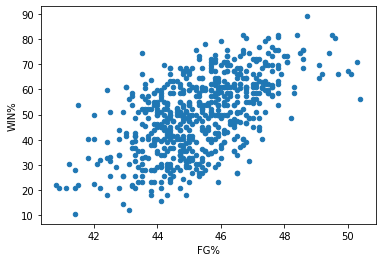

In [ ]:
#Using WIN% as the dependent variable to see the impact in regards to other variables
nbadf.plot(kind="scatter",
           x="FG%",
           y="WIN%")

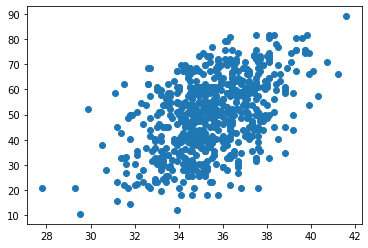

In [ ]:
plt.scatter(nbadf["3P%"],nbadf["WIN%"])
plt.show()

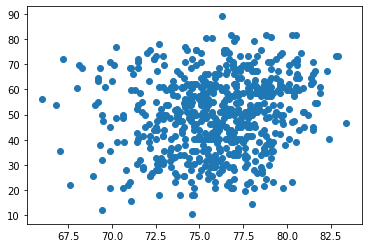

In [ ]:
plt.scatter(nbadf["FT%"],nbadf["WIN%"])
plt.show()

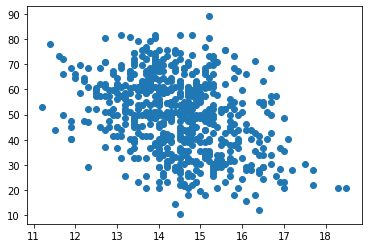

In [ ]:
plt.scatter(nbadf["TOV"],nbadf["WIN%"])
plt.show()

In [ ]:
#Defining outlier ranges to remove outlier in FG%
def outlier(datacolumn):
 sorted(datacolumn)
 Q1 = np.percentile(datacolumn,[25])
 Q3 = np.percentile(datacolumn , [75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

print(outlier(nbadf["FG%"]))

(array([41.15]), array([49.55]))


In [ ]:
nbadf[(nbadf['FG%']<41.15) | (nbadf['FG%']>49.55)]

,ID,TEAM,WIN%,FG%,3P%,FT%,TOV,SEASON
92,92,Golden State Warriors,70.7,50.3,39.1,81.5,15.4,2017-18
207,207,Philadelphia 76ers,22.0,40.8,32.0,67.6,17.7,2014-15
215,215,Miami Heat,65.9,50.1,36.4,76.0,14.8,2013-14
240,240,Miami Heat,80.5,49.6,39.6,75.4,13.9,2012-13
372,372,Phoenix Suns,56.1,50.4,38.3,74.4,15.7,2008-09
396,396,Phoenix Suns,67.1,50.0,39.3,78.3,14.4,2007-08
397,397,Utah Jazz,65.9,49.7,37.2,75.9,14.6,2007-08
567,567,Denver Nuggets,20.7,41.1,27.8,69.9,18.5,2002-03
624,624,Golden State Warriors,20.7,40.9,29.3,70.6,15.9,2000-01


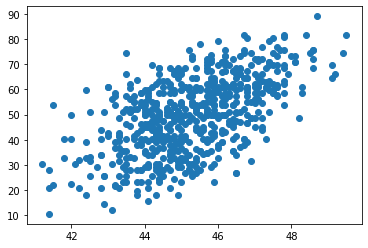

In [ ]:
#drop the outliers from FG% and re-plot with removed outliers
nbadf.drop(nbadf[(nbadf['FG%']<41.15) | (nbadf['FG%']>49.55)].index,inplace=True)
plt.scatter(nbadf['FG%'],nbadf['WIN%'])

In [ ]:
#visually assess the relationship between the output variable and each predictor variable
from sklearn import linear_model
fg_regression_model = linear_model.LinearRegression()
#Train model using FG% 
fg_regression_model.fit(X=pd.DataFrame(nbadf['FG%']),
                        y=nbadf["WIN%"])
#check model intercept and coefficient
print(fg_regression_model.intercept_)
print(fg_regression_model.coef_)


-209.027252703233
[5.71841055]


In [ ]:
#R**2 value
fg_regression_model.score(X=pd.DataFrame(nbadf['FG%']),
                        y=nbadf["WIN%"])

0.3226336552103095

In [ ]:
fg_prediction = fg_regression_model.predict(pd.DataFrame(nbadf['FG%']))

#actual - prediction = residuals
fg_residuals = nbadf['FG%']-fg_prediction
fg_residuals.describe()

count    617.000000
mean      -4.657861
std        6.975240
min      -24.534069
25%       -9.435156
50%       -4.244904
75%        0.001665
max       14.628738
Name: FG%, dtype: float64

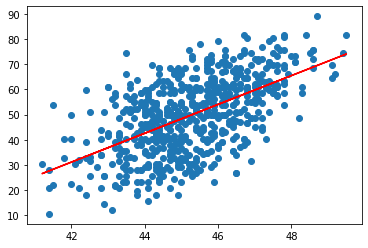

In [ ]:
plt.scatter(nbadf['FG%'],nbadf['WIN%'])
plt.plot(nbadf["FG%"],
         fg_prediction,
         color="red")

In [ ]:
#Developing a regression model for 3P% and WIN%
three_point_regression_model = linear_model.LinearRegression()
 
three_point_regression_model.fit(X=pd.DataFrame(nbadf['3P%']),
                        y=nbadf["WIN%"])
#check model intercept and coefficient
print(three_point_regression_model.intercept_)
print(three_point_regression_model.coef_)

-81.18374662729335
[3.6987767]


In [ ]:
three_point_regression_model.score(X=pd.DataFrame(nbadf['3P%']),
                                                  y=nbadf['WIN%'])

0.21299787735035602

In [ ]:
three_point_prediction = three_point_regression_model.predict(pd.DataFrame(nbadf['3P%']))

#actual - prediction = residuals
three_point_residuals = nbadf['3P%']-three_point_prediction
three_point_residuals.describe()

count    617.000000
mean     -14.493355
std        5.011646
min      -31.085364
25%      -17.861358
50%      -14.352949
75%      -11.384294
max        1.569834
Name: 3P%, dtype: float64

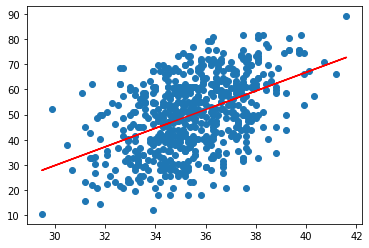

In [ ]:
plt.scatter(nbadf["3P%"],nbadf["WIN%"])
plt.plot(nbadf['3P%'],
         three_point_prediction,
         color="red")

In [ ]:
#Developing a linear regression model for FT% and WIN%
ft_regression_model = linear_model.LinearRegression()

ft_regression_model.fit(X=pd.DataFrame(nbadf['FT%']),
                        y=nbadf['WIN%'])
print(ft_regression_model.intercept_)
print(ft_regression_model.coef_)

0.48667819651230104
[0.65137249]


In [ ]:
ft_regression_model.score(X=pd.DataFrame(nbadf['FT%']),
                          y=nbadf['WIN%'])

0.01628467614801099

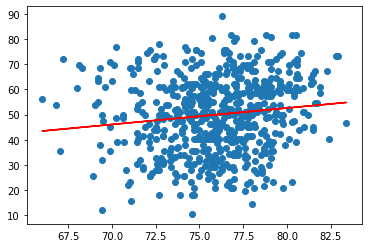

In [ ]:
ft_prediction = ft_regression_model.predict(pd.DataFrame(nbadf['FT%']))
plt.scatter(nbadf['FT%'],nbadf['WIN%'])
plt.plot(nbadf['FT%'],
         ft_prediction,
         color="red")

In [ ]:
tov_regression_model = linear_model.LinearRegression()
tov_regression_model.fit(X=pd.DataFrame(nbadf['TOV']),
                         y=nbadf['WIN%'])
print(tov_regression_model.intercept_)
print(tov_regression_model.coef_)

114.58922761566296
[-4.48078431]


In [ ]:
tov_regression_model.score(X=pd.DataFrame(nbadf['TOV']),
                           y=nbadf['WIN%'])

0.11514957457877406

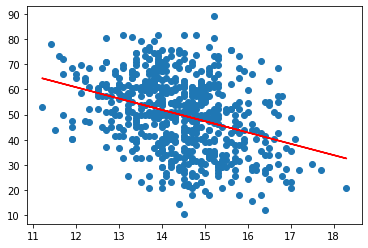

In [ ]:
tov_prediction = tov_regression_model.predict(pd.DataFrame(nbadf['TOV']))
plt.scatter(nbadf['TOV'],nbadf['WIN%'])
plt.plot(nbadf["TOV"],
         tov_prediction,
         color="red")

Does a linear model appear to be the best model to use for the relationship between the outcome variable and each predictor variable? Explain.
I don't believe a linear model is the best model to use for these relationsips because no value seems to have a deciding impact on WIN%. Even after eliminating a few outliers, FG% had the strongest R**2 at merely .32. This is proof the linear model would not be a good fit. The data points are too scattered and show little collinearity.

In [ ]:
#Subset the data into a training subset and a testing subset
import pandas as pd
import numpy as np
nbadf=pd.read_csv("/content/nba team stats.csv")
nbadf.head()

,ID,TEAM,WIN%,FG%,3P%,FT%,TOV,SEASON
0,0,Phoenix Suns,80.8,47.8,36.3,79.1,13.3,2020-21
1,1,Golden State Warriors,75.5,46.7,36.4,76.4,15.6,2020-21
2,2,Memphis Grizzlies,67.3,45.7,33.9,73.7,13.3,2020-21
3,3,Miami Heat,63.0,45.9,37.5,81.5,14.9,2020-21
4,4,Chicago Bulls,62.3,47.8,37.2,81.4,13.0,2020-21


In [ ]:
a=np.random.randn(len(nbadf))
check=a<0.8
nba_training=nbadf[check]
nba_test=nbadf[~check]
len(nba_training)

499

In [ ]:
#Use the training subset to build a multiple linear regression model for the outcome variable using all four predictor variables 
from sklearn import linear_model
X=nba_training[["FG%","3P%","FG%","TOV"]]
y=nba_training["WIN%"]
nba_train_regr=linear_model.LinearRegression()
nba_train_regr.fit(X,y)
print(nba_train_regr.intercept_)
print(nba_train_regr.coef_)

-145.0431582379341
[ 2.1178152   1.38867745  2.1178152  -3.20070098]


In [ ]:
#R**2
nba_train_regr.score(X=X,
                     y=nba_training['WIN%'])

0.4369838429424201

In [ ]:
#Renaming variables to remove % symbol
import statsmodels.formula.api as smf
nba_training.rename(columns={"WIN%":"WINpct","3P%":"ThreePpct","FG%":"FGpct","FT%":"FTpct"}, inplace=True)

In [ ]:
train=smf.ols(formula="WINpct~ThreePpct+FGpct+FTpct+TOV",data=nba_training).fit()
train.params

Intercept   -131.219374
ThreePpct      1.434554
FGpct          4.256940
FTpct         -0.197147
TOV           -3.300571
dtype: float64

In [ ]:
win_mean=np.mean(nba_training['WINpct'])
win_mean

50.074549098196385

In [ ]:
#Calculating RSE to determine efficiency
nba_training["WINpct_pred"]=-131.22+1.43*nba_training["ThreePpct"]+4.26*nba_training["FGpct"]+-0.2*nba_training["FTpct"]+-3.3*nba_training["TOV"]
nba_training["RSE"]=(nba_training["WINpct"]-nba_training["WINpct_pred"])**2
RSEd=nba_training.sum()["RSE"]
RSE=np.sqrt(RSEd/494)
RSE

<ipython-input-78-e28fc85dab4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_training["WINpct_pred"]=-131.22+1.43*nba_training["ThreePpct"]+4.26*nba_training["FGpct"]+-0.2*nba_training["FTpct"]+-3.3*nba_training["TOV"]
<ipython-input-78-e28fc85dab4d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_training["RSE"]=(nba_training["WINpct"]-nba_training["WINpct_pred"])**2


11.36196562217978

In [ ]:
RSE/win_mean

0.22690100713436123

In [ ]:
print(train.summary())

                            OLS Regression Results                            
Dep. Variable:                 WINpct   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     96.37
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           1.46e-60
Time:                        19:23:04   Log-Likelihood:                -1918.1
No. Observations:                 499   AIC:                             3846.
Df Residuals:                     494   BIC:                             3867.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -131.2194     21.428     -6.124      0.0

In [ ]:
train.pvalues

Intercept    1.865187e-09
ThreePpct    1.694333e-05
FGpct        9.622208e-25
FTpct        2.811453e-01
TOV          9.565547e-12
dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
X=nba_training[["ThreePpct","FGpct","FTpct","TOV"]]
y=nba_training[["WINpct"]]
y

,WINpct
0,80.8
1,75.5
2,67.3
3,63.0
4,62.3
...,...
619,36.6
620,31.7
621,30.5
623,23.2


In [ ]:
MSE = mean_squared_error(y,train.predict(X))
MSE

127.74688148725222

In [ ]:
RMSE = np.sqrt(MSE)
RMSE

11.30251659973354

Assess the fit of the model.

1.   Is the model statistically significant?
  Response: The F-statistic for the model was very high and the pvalues were negligible suggesting the parameters for the model were statistically significant and non-0.
2.   How much variance does the model explain overall?
  Response: R**2 comes out to .438 which would suggest an existing correlation between all variables and predictor output, albeit not a strong one.
3. What was the Root Mean Square Error of the model?
  Response: The RSE came out to 11.3 which translated to roughly 22.7%.



Report and interpret the model intercept and each coefficient along with whether each is a significant predictor in the model.


1.   Intercept: -131.22--not a significant predictor
2.   Coefficient for FG%: 4.26--a relatively significant predictor
3. Coefficent for 3p%: 1.43--a small predictor
4. Coefficient FT%:-.2--an insignificant predictor
5. Coefficient for TOV:-3.3--a relatively significant predictor


You do not necessarily need to do it for this assignment, but if you were building a model to deploy professionally, what would you do upon finding one or more of the predictor variables to have no effect on the outcome variable in the model (i.e., the coefficient for the predictor variable is not significant or may be = 0)?

In [ ]:
#Assess any potential issues with multicollinearity amongst the predictor variables
fg=smf.ols(formula="FGpct~ThreePpct+FTpct+TOV",data=nba_training).fit()
rsquared=fg.rsquared
VIF=1/(1-rsquared)
VIF

1.4985462398166063

In [ ]:
fg=smf.ols(formula="ThreePpct~FGpct+ThreePpct+FTpct+TOV",data=nba_training).fit()
rsquared=fg.rsquared
VIF=1/(1-rsquared)
VIF

<ipython-input-104-e4d62b690087>:3: RuntimeWarning: divide by zero encountered in double_scalars
  VIF=1/(1-rsquared)


inf

In [ ]:
fg=smf.ols(formula="FTpct~FGpct+ThreePpct+TOV",data=nba_training).fit()
rsquared=fg.rsquared
VIF=1/(1-rsquared)
VIF

1.1083731347243766

In [ ]:
fg=smf.ols(formula="TOV~FGpct+ThreePpct+FTpct",data=nba_training).fit()
rsquared=fg.rsquared
VIF=1/(1-rsquared)
VIF

1.1307819102386207

Were there any issues with multicollinearity in the model? Explain. The multicollinearity for 3P% was infinity meaning there is a perfect correlation and, going forward, could be dropped from the model. All other predictor variables slightly ranged in correlation.

In [ ]:
#Validate the model you built on the training data subset using the testing data subset
win_pred=train.predict(nba_training[["ThreePpct","FGpct","FTpct","TOV"]])
win_pred

0      64.844729
1      53.246536
2      53.526821
3      52.723942
4      66.672561
         ...    
619    35.310295
620    33.989358
621    33.385310
623    31.066662
624    18.524233
Length: 499, dtype: float64

In [ ]:
nba_test.rename(columns={"WIN%":"WINpct","3P%":"ThreePpct","FG%":"FGpct","FT%":"FTpct"}, inplace=True)

In [ ]:
nba_test["WINpct_pred"]=-131.22+1.43*nba_test["ThreePpct"]+4.26*nba_test["FGpct"]+-0.2*nba_test["FTpct"]+-3.3*nba_test["TOV"]
nba_test["RSE"]=(nba_test["WINpct"]-nba_test["WINpct_pred"])**2
RSEd=nba_test.sum()["RSE"]
RSE=np.sqrt(RSEd/123)
RSE

<ipython-input-114-959b553b8da8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_test["WINpct_pred"]=-131.22+1.43*nba_test["ThreePpct"]+4.26*nba_test["FGpct"]+-0.2*nba_test["FTpct"]+-3.3*nba_test["TOV"]
<ipython-input-114-959b553b8da8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba_test["RSE"]=(nba_test["WINpct"]-nba_test["WINpct_pred"])**2


11.75126141438732

In [ ]:
win_test_mean=nba_test["WINpct"].mean()
win_test_mean

49.59606299212599

Report the model validation. Does the model seem to have any issues with over fitting? Explain. The RSE values came out to be very similar with 22% and 23% respectively. This implies the training model is a pretty good fit over the testing data.

Does the model seem to meet all of the assumptions of a linear regression model? Explain. As seen below the residuals seem to have a slight symmetrical distribution and, thus, shows room for improvement in the model as opposed to being randomly distributed.

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- FGpct
- FTpct
- ThreePpct
Feature names seen at fit time, yet now missing:
- 3P%
- FG%

  warnings.warn(message, FutureWarning)


((array([-2.99148779, -2.70949569, -2.55092824, -2.43849088, -2.35038866,
         -2.27745777, -2.21494281, -2.16004641, -2.11097846, -2.06652166,
         -2.02580925, -1.98820138, -1.95321175, -1.92046179, -1.88965077,
         -1.86053573, -1.83291741, -1.8066303 , -1.7815354 , -1.75751472,
         -1.73446731, -1.71230602, -1.69095513, -1.67034836, -1.65042742,
         -1.63114071, -1.61244233, -1.5942913 , -1.57665082, -1.55948776,
         -1.54277217, -1.52647685, -1.51057708, -1.49505026, -1.47987574,
         -1.46503453, -1.45050917, -1.43628356, -1.42234281, -1.40867313,
         -1.39526172, -1.38209668, -1.36916692, -1.35646209, -1.34397251,
         -1.33168913, -1.31960346, -1.30770751, -1.2959938 , -1.28445526,
         -1.27308524, -1.26187747, -1.250826  , -1.23992522, -1.22916982,
         -1.21855477, -1.20807526, -1.19772678, -1.187505  , -1.17740581,
         -1.1674253 , -1.15755974, -1.14780558, -1.13815942, -1.12861802,
         -1.11917828, -1.10983722, -1.

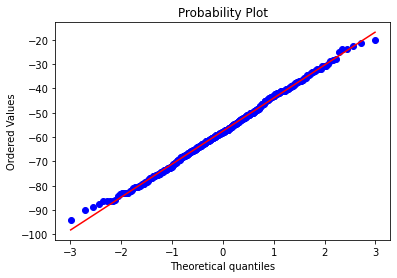

In [ ]:
from scipy import stats
win_prediction=nba_train_regr.predict(X=X)
residuals=nba_training["WINpct"]-win_prediction
stats.probplot(residuals, dist="norm", plot=plt)

Based on your model, what would the predicted winning percentage be for a team that had a field goal percentage = 47.7%, a 3 point percentage = 34.1%, a free throw percentage = 80.2 %, and turnovers per game = 15.9?

In [ ]:
win_percent = -131.22+(4.26*47.7)+(1.43*34.1)+(.2*80.2)+(-3.3*15.9)
win_percent

84.315